In [108]:
# Import libraries
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from efficient_apriori import apriori
import numpy as np
from dfply import *

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from fuzzywuzzy import fuzz

In [109]:
# Functions to be used
def load_data(file):
    return pd.read_csv(file)

In [110]:
# Data loading
HiredCandidates_df = load_data(r'D:\vanhack\data\HiredCandidates.csv')
HiredJobs_df = load_data(r'D:\vanhack\data\HiredJobDetails.csv')

Candidates_df = load_data(r'D:\vanhack\data\AvailableCandidates.csv')
JobsToPredict_df = load_data(r'D:\vanhack\data\JobsToPredict.csv')

### Feature Engineering

In [111]:
# Splitting Skills into separate elements in a list
HiredJobs_df['Skills'] = HiredJobs_df['Skills'].apply(lambda v: v.rsplit(', '))
HiredCandidates_df['Skills'] = HiredCandidates_df['Skills'].apply(lambda v: v.rsplit(', '))

Hired_df = pd.merge(HiredJobs_df, HiredCandidates_df, left_on='JobId', right_on='HiredForJobId')

### EDA

In [112]:
# Candidates to be hired by position
CandidatesByPosition_df = Candidates_df.groupby(['UsersPosition']).size().to_frame('Candidate_count').reset_index()
CandidatesByPosition_df = CandidatesByPosition_df.sort_values('Candidate_count', ascending = False).head(10)

In [182]:
HiredCandidatesByPosition_df

,UsersPosition,Candidate_count
117,Software Engineer,17
100,Senior Software Engineer,9
112,Software Developer,8
41,Full Stack Developer,8
77,Mobile Developer,4
134,Web Developer,4
95,Senior Software Developer,4
59,Fullstack Developer,4
35,Front End Developer,3
88,Senior Full Stack Developer,3


In [113]:
# Hired Candidates by position
HiredCandidatesByPosition_df = HiredCandidates_df.groupby(['UsersPosition']).size().to_frame('Candidate_count').reset_index()
HiredCandidatesByPosition_df = HiredCandidatesByPosition_df.sort_values('Candidate_count', ascending = False).head(10)

In [114]:
# Hired Jobs
HiredJobsPosition_df = HiredJobs_df.groupby(['POSITION']).size().to_frame('Jobs_count').reset_index()
HiredJobsPosition_df = HiredJobsPosition_df.sort_values('Jobs_count', ascending = False).head(10)

In [115]:
CandidatesByPosition_df.sort_values('Candidate_count', ascending = False).head(10)

,UsersPosition,Candidate_count
4684,Software Engineer,462
4566,Software Developer,393
1847,Full Stack Developer,265
4324,Senior Software Engineer,144
5596,Web Developer,106
2772,Java Developer,101
1241,Developer,87
4302,Senior Software Developer,72
389,Android Developer,64
1948,Full Stack Web Developer,55


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Available Candidates count'),
 Text(0.5, 1.0, '#Candidates available to hire by Positions')]

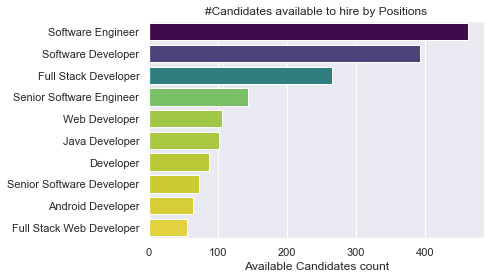

In [116]:
# Have to add labels/color
sns.set(style="darkgrid")

# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(6, 15))

# Plot Talent pool by positions
sns.set_color_codes("pastel")
ax = sns.barplot(x="Candidate_count", y="UsersPosition", data=CandidatesByPosition_df,
           palette=plt.cm.ScalarMappable(cmap='viridis_r').to_rgba(CandidatesByPosition_df["Candidate_count"]))

ax.set(xlabel='Available Candidates count', ylabel='', title = '#Candidates available to hire by Positions')

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Hired Candidates count'),
 Text(0.5, 1.0, '#Candidates hired in each Position')]

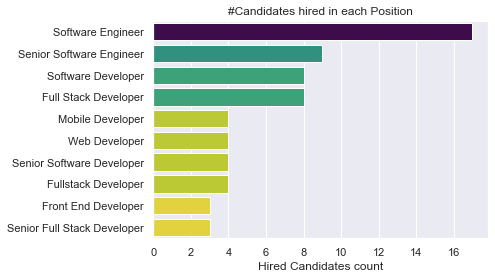

In [117]:
# Plot hired candidates by positions
sns.set_color_codes("pastel")
ax = sns.barplot(x="Candidate_count", y="UsersPosition", data=HiredCandidatesByPosition_df,
            palette=plt.cm.ScalarMappable(cmap='viridis_r').to_rgba(HiredCandidatesByPosition_df["Candidate_count"]))
ax.set(xlabel='Hired Candidates count', ylabel='', title = '#Candidates hired in each Position')

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Jobs Hired for(count)'),
 Text(0.5, 1.0, '#Jobs hired in each Position')]

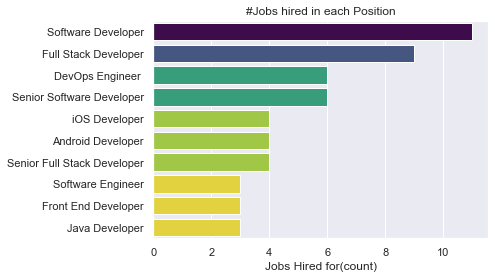

In [118]:
# Plot jobs hired by positions
sns.set_color_codes("pastel")
ax = sns.barplot(x="Jobs_count", y="POSITION", data=HiredJobsPosition_df,
            palette=plt.cm.ScalarMappable(cmap='viridis_r').to_rgba(HiredJobsPosition_df["Jobs_count"]))
ax.set(xlabel='Jobs Hired for(count)', ylabel='', title = '#Jobs hired in each Position')

In [119]:
# Apriori algorithm to find associations between skills
# itemsets, rules = apriori(skills, min_support=0.5,  min_confidence=1)
# print(rules)

In [120]:
# SKills_x = Job posting skills
# Skills_y = Candidate skills

In [121]:
#Hired_df = pd.merge(HiredJobs_df, HiredCandidates_df, left_on='JobId', right_on='HiredForJobId')

In [122]:
# Hired_df['Skills_x'] = Hired_df['Skills_x'].apply(lambda v: v.rsplit(', '))
# Hired_df['Skills_y'] = Hired_df['Skills_y'].apply(lambda v: v.rsplit(', '))

In [123]:
def FindSkillsMatched(df_name,skills_left, skills_right):
    for i in range(len(df_name)):
        SkillsMatched.append(list(set(Hired_df[skills_left][i]) & set(Hired_df[skills_right][i])))
        
        while i == len(df_name):
            df_name['SkillsMatched'] = SkillsMatched

In [124]:
FindSkillsMatched(Hired_df, 'Skills_x', 'Skills_y')

In [125]:
# Finding skills that match both on Job desc and candidate profile
def FindMatched():
    for i in range(len(Hired_df)):
        SkillsMatched.append(list(set(Hired_df['Skills_x'][i]) & set(Hired_df['Skills_y'][i])))

SkillsMatched = []
FindMatched()
Hired_df['SkillsMatched'] = SkillsMatched

# Finding match percentage
def FindMatchPercent():
    for i in range(len(Hired_df)):
        MatchPercent.append(round(len(Hired_df['SkillsMatched'][i])/len(Hired_df['Skills_x'][i])* 100, 2))
        
MatchPercent = []
FindMatchPercent()
Hired_df['MatchPercent'] = MatchPercent

# Adding #skills for each hired candidate
def FindSkillsNum():
    for i in range(len(Hired_df)):
        SkillsNum.append(len(Hired_df['Skills_y'][i]))
        
SkillsNum = []
FindSkillsNum()
Hired_df['SkillsNum'] = SkillsNum

# Adding Position match between Job posting and hired candidate
PositionMatch = []
def CalculatePositionMatch():
    for i in range(len(Hired_df)):
        PositionMatch.append(fuzz.token_sort_ratio(Hired_df['POSITION'][i], Hired_df['UsersPosition'][i]))
        
CalculatePositionMatch()
Hired_df['PositionMatch'] = PositionMatch

In [126]:
# Candidates with Top# of Skills
(Hired_df.sort_values(by='SkillsNum', ascending=False).head(10) >>
select(X.JobId, X.POSITION, X.UsersPosition, X.SkillsMatched, X.MatchPercent, X.SkillsNum))

,JobId,POSITION,UsersPosition,SkillsMatched,MatchPercent,SkillsNum
165,1630,Software Developer,An IT professional with 19+ years experience,"[python, react.js]",100.00,220
133,1289,Senior Java Developer,Senior Software Engineer,"[javascript, css, html, full stack, angular, j...",87.50,127
144,1590,Senior Software Developer,Full Stack Developer,"[javascript, mysql, python, angular, typescript]",62.50,71
29,1762,C# .NET Developer,Experienced Full Stack Developer,"[sql, css, bootstrap, c#, typescript]",83.33,66
121,1264,Senior Front End Developer,Make a better world through technology,"[javascript, git, ecmascript, css, agile metho...",61.54,65
126,1446,Senior Full Stack Developer,Senior Software Engineer,"[javascript, mysql, rest api, php, react.js]",55.56,65
181,1797,SR Developer in Test,Software QA Automation Engineer,"[selenium, java, unit testing, test automation...",100.00,64
66,1177,Fullstack Javascript/NodeJS Developer,Senior Software Developer,"[javascript, css, html, node.js, mochajs, aws]",75.00,63
166,1662,Software Developer,Full-Stack Developer,"[javascript, node.js]",100.00,58
10,976,senior Java Developer,Java Architect and Senior Java Developer,"[sql, rest api, mongodb, design patterns, agil...",76.92,58


In [127]:
Hired_df['SkillsNum'].describe()

count    202.000000
mean      27.099010
std       21.666401
min        1.000000
25%       14.000000
50%       22.000000
75%       37.750000
max      220.000000
Name: SkillsNum, dtype: float64

In [128]:
# Instresting find/ 13 Candidates with no skill match got hired
Hired_df[Hired_df['MatchPercent']== 0.00].head()

,JobId,Responsibilities,POSITION,Skills_x,UserId,HiredForJobId,Skills_y,UsersPosition,SkillsMatched,MatchPercent,SkillsNum,PositionMatch
14,1318,<p>Design and develop a robust Akamai solution...,Akamai Developer,"[akamai, angular, apache, aws, azure, cassandra]",697973,1318,"[problem solving, engagement, troubleshooting,...",Skilled Engineer looking for new challenges,[],0.0,8,24
20,1444,<p>Toronto based company looks for a Back End ...,Back End Software Developer,"[any programmer language, mysql, nosql, orient...",678956,1444,"[javascript, angular, mongodb, aws, git, react...",Software Engineer,[],0.0,7,59
21,1444,<p>Toronto based company looks for a Back End ...,Back End Software Developer,"[any programmer language, mysql, nosql, orient...",768863,1444,"[docker, java, spring boot, mongodb, python, m...",Software Engineer,[],0.0,6,59
22,1561,<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&...,Backend Developer,[backend development],681622,1561,"[microservices, java, rest api, soap, web serv...",Senior Software Engineer,[],0.0,39,29
33,1584,<ul>\n <li>An undergraduate degree in Compute...,Data Engineer,"[blockchain technologies, hadoop, spark]",639994,1584,"[machine learning, relational database, sql, i...",Data Analyst,[],0.0,23,32


### Data Modelling


In [129]:
# fit model no training data
model = XGBClassifier()
#model.fit(Hired_df, Candidates_df)

In [130]:
X =Hired_df.groupby(['MatchPercent']).size().to_frame('MatchPercent_count').reset_index()

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Jobs Hired for(count)'),
 Text(0.5, 1.0, '#Jobs hired in each Position')]

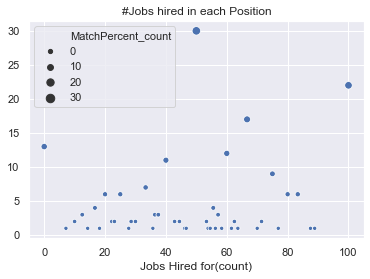

In [131]:
# Range of Skill match percent that got hired
ax = sns.scatterplot(x='MatchPercent', y="MatchPercent_count", size ='MatchPercent_count', data=X)
ax.set(xlabel='Jobs Hired for(count)', ylabel='', title = '#Jobs hired in each Position')

In [132]:
#Refining Candidate Profiles
FilteredCandidates_df = Candidates_df[Candidates_df['EnglishLevel']!=0] # Removing Candidates with English level '0'
FilteredCandidates_df = FilteredCandidates_df[(FilteredCandidates_df['YearsOfExperience']!=0) & #and no xp with Eng '1'
                                              (FilteredCandidates_df['EnglishLevel']!=1)].reset_index()

Candidates_df['Skills'] = Candidates_df['Skills'].apply(lambda v: v.rsplit(', '))
FilteredCandidates_df['Skills'] = FilteredCandidates_df['Skills'].apply(lambda v: v.rsplit(', '))

#### Test on 1 data point from candidates

In [133]:
#FilteredCandidates_df = FilteredCandidates_df.reset_index()

In [134]:
FilteredCandidates_df.head(1)

,index,UserId,Skills,UsersPosition,YearsOfExperience,EnglishLevel
0,1,533339,"[ruby on rails, sql server, javascript, html5,...",Web Developer Fullstack,9,4


In [135]:
def FindSkillsMatched(df_name,skills_left, skills_right):
    for i in range(len(df_name)):
        SkillsMatched.append(list(set(Hired_df[skills_left][i]) & set(Hired_df[skills_right][i])))
        
        while i == len(df_name):
            df_name['SkillsMatched'] = SkillsMatched

In [136]:
Positions_to_hire = list(JobsToPredict_df.POSITION)

In [137]:
Positions_to_hire

['Backend Developer',
 'Backend NodeJS Developer',
 'Cloud DevOps Specialist',
 'Game Developer',
 'Mobile Developer (React Native)',
 'Senior Front End Engineer',
 'Senior Mobile App Developer',
 'Software Developer',
 'Sr Backend Developer (Python)',
 'Sr Backend Engineer (Java)']

In [139]:
# def CalculatePositionMatch():
#     for i,k in range(len(JobsToPredict_df),range(len(FilteredCandidates_df)):
#         PositionMatch.append(fuzz.token_sort_ratio(JobsToPredict_df['POSITION'][i], FilteredCandidates_df['UsersPosition'][i]))

In [140]:
# for i in range(len(FilteredCandidates_df)):
#     list(set(FilteredCandidates_df['Skills'][i]) & set(JobsToPredict_df['Skills'][i]))

### Create False Dataset with 200 random candidates who are unlikely to get hired

##### Conditions for getting Candidate unlikely to be hired:
  * Candidate skills match with already hired jobs must be low ( selected >.20 <.30 for sample)
  * Position match should be low
  * Experience must be low with low Engish level

In [141]:
# Df names
HiredCandidates_df
HiredJobs_df
Hired_df

Candidates_df
JobsToPredict_df

,JobId,Responsibilities,POSITION,Skills
0,3030,<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&...,Backend Developer,"api, aws, google cloud, java, mongodb, node.js..."
1,3018,<p>A global event travel tech company with off...,Backend NodeJS Developer,"angular, http, javascript, node.js, react.js, ..."
2,3004,<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&...,Cloud DevOps Specialist,"aws, jboss, linux, perl, python"
3,2946,<p>&nbsp;<em>Good communication skills</em><br...,Game Developer,"c, c++, game development, unity"
4,2967,<p><strong>The perfect candidate:</strong></p>...,Mobile Developer (React Native),"gradle, javascript, jenkins, jest, react nativ..."
5,3020,<p>Awesome company in Toronto is hiring for se...,Senior Front End Engineer,"angular, css, html, javascript, react.js"
6,3009,<p><strong>Must-have-skills</strong></p>\n<p>-...,Senior Mobile App Developer,"dart, ionic framework, javascript, kotlin, nat..."
7,3022,<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&...,Software Developer,"angular, javascript, react.js"
8,3015,<p>Waterloo based startup is hiring a Sr Back ...,Sr Backend Developer (Python),"aws, continuos deployment, continuous integrat..."
9,2957,<p>Great startup located in the vibrant Berlin...,Sr Backend Engineer (Java),"clean code, ddd, distributed systems developme..."


In [142]:
HiredCandidates_df

,UserId,HiredForJobId,Skills,UsersPosition
0,533441,1357,"[django, docker, typescript, flask, numpy, pan...",Senior Developer / CTO
1,634908,1265,"[oop, nosql, agile, agile development methodol...",Full Stack Developer
2,635261,1590,"[fast learning, strong communication skills, g...",Mobile Developer
3,635309,1635,"[css, html, xml, mobile development, e-commerc...",Web Developer
4,635575,1797,"[unity, android studio, xcode, gradle, ant, ma...",Software QA Automation Engineer
...,...,...,...,...
197,868605,1416,"[python, ruby on rails, vue.js, react.js, reac...",Full Stack Developer
198,899238,2867,"[resque, mvc, postgresql, flux, backbone.js, b...",Full Stack Ruby on Rails Developer
199,899598,1677,"[j2ee, celery, kafka, rabbit mq, django, sql, ...",Java/python/javascript webapp/REST API developer
200,911871,2896,"[full stack, sql, angular, javascript, react.j...",Senior Full Stack Developer


In [144]:
# for i,j in range(len(Candidates_df)), range(len(HiredCandidates_df)):
#     while j < len(HiredCandidates_df):
#         set(Candidates_df['Skills'][i]) & set(HiredCandidates_df['Skills'][i])    

In [145]:
Available = Candidates_df.sample(n = 100, random_state=7)
Hired = HiredCandidates_df.sample(n = 20, random_state=7)

In [146]:
# For all available candidates calculating skill match with all hired jobs
d=[]
for i in range(len(Available)):
    for j in range(len(Hired)):
        a = round(len(list(set(Candidates_df['Skills'][i]) & set(HiredCandidates_df['Skills'][j])))/len(HiredCandidates_df['Skills'][j]),2)
        p = Candidates_df['UserId'][i]
        can_pos = Candidates_df['UsersPosition'][i]
        
        q = HiredCandidates_df['UserId'][j]
        hired_pos = HiredCandidates_df['UsersPosition'][j]
        d.append({'Candidate_id': p, 'CandidatePosition': can_pos, 'SkillMatch': a, 'Hired_User_id': q, 'HiredPosition': hired_pos })
d = pd.DataFrame(d)
d.head()

,Candidate_id,CandidatePosition,SkillMatch,Hired_User_id,HiredPosition
0,533334,Software Engineer,0.0,533441,Senior Developer / CTO
1,533334,Software Engineer,0.0,634908,Full Stack Developer
2,533334,Software Engineer,0.0,635261,Mobile Developer
3,533334,Software Engineer,0.0,635309,Web Developer
4,533334,Software Engineer,0.0,635575,Software QA Automation Engineer


In [147]:
# Limiting candidates who have skill match between .10 & .13 returning just 550 out of 2000 datapoints
d = d[(d['SkillMatch'] > 0.20) & (d['SkillMatch'] < 0.30)]

In [148]:
d['SkillMatch'].describe()

count    66.000000
mean      0.244242
std       0.024373
min       0.210000
25%       0.222500
50%       0.250000
75%       0.260000
max       0.290000
Name: SkillMatch, dtype: float64

In [149]:
d.sort_values(by = 'SkillMatch', ascending= False)

,Candidate_id,CandidatePosition,SkillMatch,Hired_User_id,HiredPosition
1714,553653,18+ years delivering smart solutions,0.29,638045,Java Developer
1594,553639,Software Engineering - Senior Analyst,0.29,638045,Java Developer
1595,553639,Software Engineering - Senior Analyst,0.29,638135,Senior Software Engineer
317,533403,Software Developer,0.29,638625,Senior Software Engineer
781,533490,Senior Software Engineer,0.28,634908,Full Stack Developer
...,...,...,...,...,...
917,533511,"Web/Mobile Dev - RoR, Java, Android, JS, Angular",0.21,638625,Senior Software Engineer
1637,553642,Full-Stack Developer,0.21,638625,Senior Software Engineer
834,533494,Full Stack Developer,0.21,638045,Java Developer
1097,543525,Passionate Software Engineer living in Vancouver,0.21,638625,Senior Software Engineer


In [150]:
# Selecting just one random data point for each candidate from dataset d
rand_candidates = []
for i in d['Candidate_id'].unique():
    rand_candidates.append(d[d['Candidate_id'] == i].sample(n = 1, random_state=7))      

In [151]:
len(d['Candidate_id'].unique())

34

In [152]:
rand_candidates = pd.concat(rand_candidates, ignore_index=True)

In [153]:
#rand_candidates.reset_index(inplace=True, drop=True) 

In [154]:
rand_candidates = rand_candidates.sort_index(axis=1)

In [155]:
idx = Candidates_df.index.intersection(rand_candidates.index)
print (idx)

RangeIndex(start=0, stop=34, step=1)


In [156]:
# Candidates who are likely not to be hired
FalseCandidates_df = Candidates_df.ix[idx]

# Removing candidates without experience and with English level = 0
FalseCandidates_df = FalseCandidates_df[(FalseCandidates_df['YearsOfExperience']!=0) & (FalseCandidates_df['EnglishLevel']!=0)]

F:\Learning\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [157]:
FalseCandidates_df['Target'] = 0
HiredCandidates_df['Target'] = 1

Hired_final_df = pd.concat([HiredCandidates_df, FalseCandidates_df])

F:\Learning\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


#### Prediction using Logistic model

In [158]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [159]:
Candidates_test_df = Candidates_df.sample(n = 150, random_state=7)
Candidates_test_df['Target'] = 0

In [160]:
Hired_final_df

,EnglishLevel,HiredForJobId,Skills,Target,UserId,UsersPosition,YearsOfExperience
0,NaN,1357.0,"[django, docker, typescript, flask, numpy, pan...",1,533441,Senior Developer / CTO,NaN
1,NaN,1265.0,"[oop, nosql, agile, agile development methodol...",1,634908,Full Stack Developer,NaN
2,NaN,1590.0,"[fast learning, strong communication skills, g...",1,635261,Mobile Developer,NaN
3,NaN,1635.0,"[css, html, xml, mobile development, e-commerc...",1,635309,Web Developer,NaN
4,NaN,1797.0,"[unity, android studio, xcode, gradle, ant, ma...",1,635575,Software QA Automation Engineer,NaN
...,...,...,...,...,...,...,...
27,3.0,NaN,"[wordpress, digital, less / sass, grails, ioni...",0,533454,Experienced Frontend developer with UI/UX skills,10.0
28,3.0,NaN,"[javascript, spring, css, node.js, react.js, j...",0,533456,Software Engineer,6.0
30,3.0,NaN,"[javascript, wordpress, html5, classic asp, do...",0,533469,"Senior System Analyst, CSM® and CSPO®",10.0
31,3.0,NaN,"[android, sql server, wordpress, laravel, json...",0,533472,Software Developer,9.0


In [161]:
cols = ['UserId', 'UsersPosition', 'Skills', 'Target']

X_train_df = Hired_final_df.drop(columns = ['EnglishLevel','HiredForJobId', 'YearsOfExperience']).copy()
X_train_df = X_train_df[cols]

Y_train_df = X_train_df.loc[:, X_train_df.columns == 'Target'].copy()

# Y_train_df = Candidates_test_df.drop(columns = ['EnglishLevel', 'YearsOfExperience']).copy()
# Y_train_df = Y_train_df[cols]

X_train_df['train'] = 1
#Y_train_df['train'] = 1


#train_df = pd.concat([X_train_df, Y_train_df])

In [162]:
#X_train_df = Hired_final_df.drop(columns = ['EnglishLevel','HiredForJobId', 'YearsOfExperience']).copy()

In [163]:
X_test_df = Candidates_df.sample(n = 50, random_state=7)
X_test_df['Target'] = ""
X_test_df = X_test_df[cols].copy()
X_test_df['train'] = 0

Y_test_df = X_test_df.loc[:, X_test_df.columns == 'Target'].copy()

In [164]:
combinedX_df = pd.concat([X_train_df, X_test_df])

In [165]:
combinedX_df

,UserId,UsersPosition,Skills,Target,train
0,533441,Senior Developer / CTO,"[django, docker, typescript, flask, numpy, pan...",1,1
1,634908,Full Stack Developer,"[oop, nosql, agile, agile development methodol...",1,1
2,635261,Mobile Developer,"[fast learning, strong communication skills, g...",1,1
3,635309,Web Developer,"[css, html, xml, mobile development, e-commerc...",1,1
4,635575,Software QA Automation Engineer,"[unity, android studio, xcode, gradle, ant, ma...",1,1
...,...,...,...,...,...
1411,641088,Degree in Computing,"[android, html5, postgresql, jsf, hibernate, e...",,0
623,636981,Software Engineer,"[tdd, sql server, scrum, css3, pl/sql, phonega...",,0
3503,653306,Senior Quality Assurance,"[soap, test planning and test script, jira, ag...",,0
3066,650030,Enterprise Architect,"[software developer, software architecture, so...",,0


In [166]:
skills_df = pd.get_dummies(combinedX_df['Skills'].apply(pd.Series).stack()).sum(level=0)
combinedX_df = combinedX_df.loc[~combinedX_df.index.duplicated(keep='first')]
skills_df = skills_df.loc[~skills_df.index.duplicated(keep='first')]

combinedX_df = pd.concat([combinedX_df, skills_df], axis= 1)
combinedX_df = combinedX_df.drop(columns = ['Skills'])

In [167]:
# Converting skills to dummies

# skills_df = pd.get_dummies(combined_df['Skills'].apply(pd.Series).stack()).sum(level=0)
# combined_df = combined_df.loc[~combined_df.index.duplicated(keep='first')]
# skills_df = skills_df.loc[~skills_df.index.duplicated(keep='first')]

# combined_df = pd.concat([combined_df, skills_df], axis= 1)
# combined_df = combined_df.drop(columns = ['Skills'])

In [168]:
# Encoding UserPosition using LabelEncoder()
le_UserPosition = LabelEncoder()

combinedX_df['UsersPosition'] = le_UserPosition.fit_transform(combinedX_df['UsersPosition'])

In [169]:
X_train_df.shape

(220, 5)

In [170]:
Y_train_df = X_train_df.loc[:, X_train_df.columns == 'Target'].copy()

In [171]:
Y_train_df

,Target
0,1
1,1
2,1
3,1
4,1
...,...
27,0
28,0
30,0
31,0


In [172]:
# Separating into Train_X and Train_Y datasets
X_train_df = combinedX_df[combinedX_df['train']==1].copy()
X_test_df = combinedX_df[combinedX_df['train']==0].copy()

# X_train_df.drop(["train"], axis=1, inplace=True)
# X_test_df.drop(["train"], axis=1, inplace=True)

In [173]:
# Separating into Train_X and Train_Y datasets
# X_df = combined_df[combined_df['train']==1].copy()
# Y_df = combined_df[combined_df['train']==0].copy()

# X_df.drop(["train"], axis=1, inplace=True)
# Y_df.drop(["train"], axis=1, inplace=True)

In [174]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [175]:
logisticRegr = LogisticRegression()

In [176]:
#X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df,random_state = 50 )

In [177]:
#X_test.drop(columns = ['EnglishLevel', 'YearsOfExperience'], axis=1, inplace=True)

In [178]:
# skills_df = pd.get_dummies(X_test['Skills'].apply(pd.Series).stack()).sum(level=0)
# X_test = X_test.loc[~X_test.index.duplicated(keep='first')]
# skills_df = skills_df.loc[~skills_df.index.duplicated(keep='first')]

# X_test = pd.concat([X_test, skills_df], axis= 1)
# X_test = X_test.drop(columns = ['Skills'])

In [179]:
# X_test['UsersPosition'] = le_UserPosition.fit_transform(X_test['UsersPosition'])

In [180]:
X_train_df['unknown']

KeyError: 'unknown'

In [ ]:
Y_train_df

In [ ]:
X_train_df

In [ ]:
X_train_df.drop(['Target'],axis = 1, inplace=True)

In [ ]:
logisticRegr.fit(X_train_df, Y_train_df)

In [ ]:
logisticRegr.predict(X_test[0:10])

#### Transformations to make
* Find corelation between jobs to hire skills and candidate skills to find the job with closest match.
* Use FuzzyWuzzy to find match between position names
* Convert Skills into list in each row - For apriori analysis
* Convert Skills horizontally with 1s and 0s - For XGB boost or prediction modelling


#### To do list
* Feature Engineer Match % between Job skills and skills of candidates who got hired
* Add colour to plots and change style for readablity and best practice
* Add Emoji to plots
* Change Column names to lowercase

#### Plot Ideas
* Job Demand/Talent supply graph( Two sided vertical bar plot)

#### Pain points
* Creating a new column by manipulating other columns using lambda function ( When column being manipulated is a list)
* Have to think of a better way to match positions and to assign a value for each skill and maybe position name
